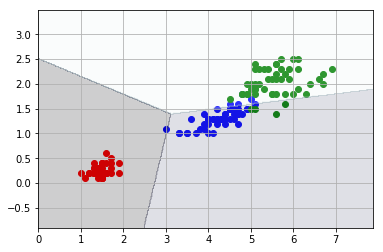

In [16]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Iris dataset 
iris = datasets.load_iris()
features = iris.data
target = iris.target
target_names = iris.target_names
labels = target_names[target]

# features: Petal length &  Petal width
setosa_petal_length = features[labels == 'setosa', 2]
setosa_petal_width = features[labels == 'setosa', 3]
setosa = np.c_[setosa_petal_length, setosa_petal_width]
versicolor_petal_length = features[labels == 'versicolor', 2]
versicolor_petal_width = features[labels == 'versicolor', 3]
versicolor = np.c_[versicolor_petal_length, versicolor_petal_width]
virginica_petal_length = features[labels == 'virginica', 2]
virginica_petal_width = features[labels == 'virginica', 3]
virginica = np.c_[virginica_petal_length, virginica_petal_width]

plt.scatter(setosa[:, 0], setosa[:, 1], color='red')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue')
plt.scatter(virginica[:, 0], virginica[:, 1], color='green')


# prepare train data
training_data = np.r_[setosa, versicolor, virginica]
training_labels = np.r_[
    np.zeros(len(setosa)),
    np.ones(len(versicolor)),
    np.ones(len(virginica)) * 2,
]

# training
clf = svm.LinearSVC()
clf.fit(training_data, training_labels)


# plot mesh
training_x_min = training_data[:, 0].min() - 1
training_x_max = training_data[:, 0].max() + 1
training_y_min = training_data[:, 1].min() - 1
training_y_max = training_data[:, 1].max() + 1
grid_interval = 0.02
xx, yy = np.meshgrid(
    np.arange(training_x_min, training_x_max, grid_interval),
    np.arange(training_y_min, training_y_max, grid_interval),
)

# classify
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.2)

plt.autoscale()
plt.grid()
plt.show()